# Here we compare the two ELFIN passes to see if the IB moved. 
ELFIN-B pass started at 3:35 UT, while the ELFIN-A pass started at 4:14 UT.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

import elfinasi

c:\Users\shumkms1\AppData\Local\anaconda3\envs\asilib_dev_20241108\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [10]:
time_ranges_str = np.array([
    ['2022-09-04T03:35', '2022-09-04T03:40'],
    ['2022-09-04T04:14', '2022-09-04T04:23']
    ])
time_ranges = pd.to_datetime(time_ranges_str.flatten()).to_numpy().reshape(time_ranges_str.shape)

sc_ids = [
    'b',
    'a'
]
mlat_bounds = [55, 70]

In [3]:
epad_objs = []
for sc_id, time_range in zip(sc_ids, time_ranges_str):
    epad_objs.append(elfinasi.EPD_PAD(
        sc_id, time_range, start_pa=0, min_counts=None, accumulate=1, spin_time_tol=(2.5, 12),
        lc_exclusion_angle=0)
    )

Need to get the Ion data from Anton for this to work.

In [4]:
ipad_objs = []
for sc_id, time_range in zip(sc_ids, time_ranges_str):
    ipad_objs.append(elfinasi.EPD_PAD_ARTEMYEV(
        sc_id, time_range, min_counts=None, lc_exclusion_angle=0)
    )

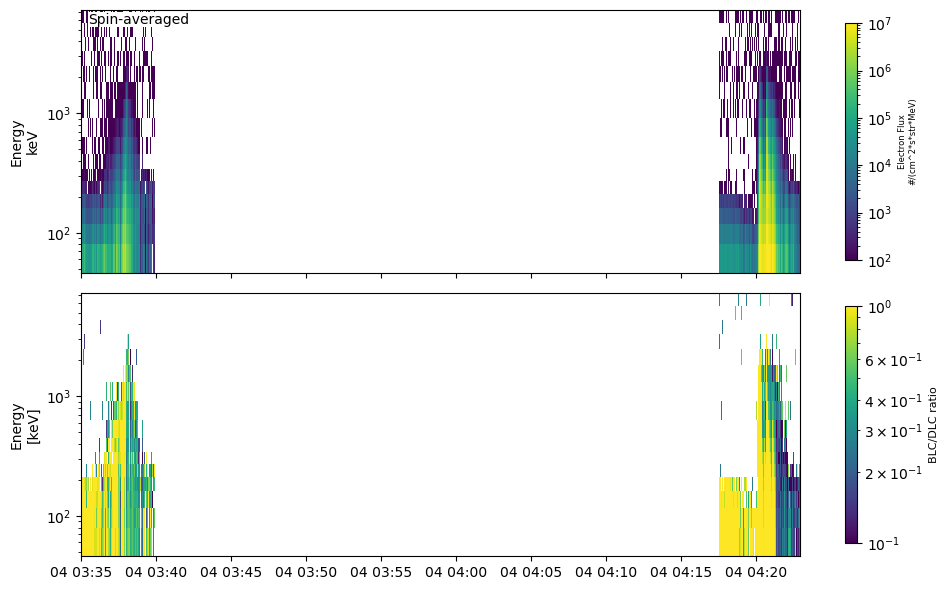

In [6]:
fig, ax = plt.subplots(len(epad_objs), 1, sharex=True, figsize=(10, 6))
for i, pad_obj in enumerate(epad_objs):
    if i == 0:
        colorbar=True
    else:
        colorbar=False
    pad_obj.plot_omni(ax=ax[0], colorbar=colorbar, vmin=1E2, vmax=1E7)
    pad_obj.plot_blc_dlc_ratio(ax=ax[1], colorbar=colorbar, vmin=0.1, vmax=1)
plt.tight_layout()

# Plot the ELFIN-B and -A data aligned by MLAT.

2022-09-04 03:35:56 2022-09-04 03:40:00
2022-09-04 04:18:53 2022-09-04 04:22:56


C:\Users\shumkms1\Documents\research\elfinasi\src\elfinasi\elfin.py:1706: RuntimeWarning: Mean of empty slice
  z = np.nanmean(self.flux['flux'], axis=1).T


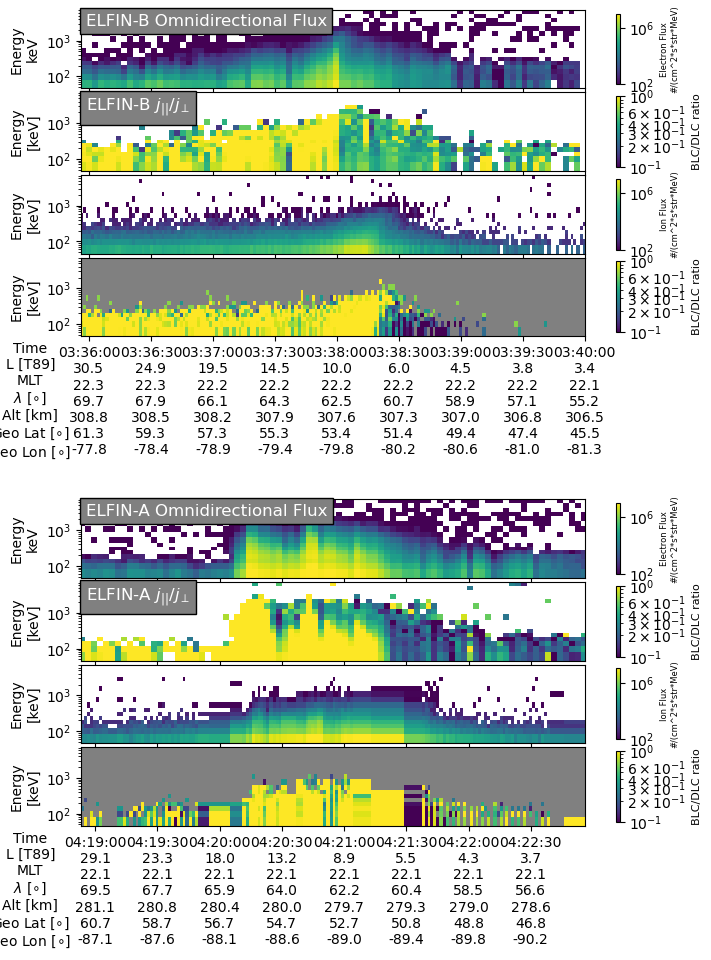

In [15]:
spec_fig = plt.figure(figsize=(14, 12))
gs = spec_fig.add_gridspec(2, 1, hspace=0.5, right=0.95, left=0.5, bottom=0.2)
elfina_gs = gs[0, 0].subgridspec(4, 1, wspace=0.05, hspace=0.05)
elfinb_gs = gs[1, 0].subgridspec(4, 1, wspace=0.01, hspace=0.05)

ax = 8*[None]
ax[0] = spec_fig.add_subplot(elfina_gs[0, 0])
ax[1] = spec_fig.add_subplot(elfina_gs[1, 0], sharex=ax[0])
ax[2] = spec_fig.add_subplot(elfina_gs[2, 0], sharex=ax[0])
ax[3] = spec_fig.add_subplot(elfina_gs[3, 0], sharex=ax[0])
ax[4] = spec_fig.add_subplot(elfinb_gs[0, 0])
ax[5] = spec_fig.add_subplot(elfinb_gs[1, 0], sharex=ax[4])
ax[6] = spec_fig.add_subplot(elfinb_gs[2, 0], sharex=ax[4])
ax[7] = spec_fig.add_subplot(elfinb_gs[3, 0], sharex=ax[4])
ax = np.array(ax)

for i in range(8):
    if (i == 3) or (i == 7):
        continue
    ax[i].tick_params(axis='x', labelbottom=False)

# ax[0].tick_params(axis='x', labelbottom=False)
# ax[2].tick_params(axis='x', labelbottom=False)

z = zip(
    ax[[0, 4]], 
    ax[[1, 5]],
    ax[[2, 6]], 
    ax[[3, 7]], 
    epad_objs,
    ipad_objs, 
    time_ranges, 
    sc_ids
    )

for eomni_ax, eratio_ax, iomni_ax, iratio_ax, epad_obj, ipad_obj, time_range, sc_id in z:
    transformed_state = epad_obj.transform_state()
    filtered_state = transformed_state[
        (transformed_state.mlat >= mlat_bounds[0]) &
        (transformed_state.mlat <= mlat_bounds[1]) &
        (transformed_state.index >= time_range[0]) &
        (transformed_state.index <= time_range[1])
        ]
    print(f'{filtered_state.index[0]} {filtered_state.index[-1]}')
    epad_obj.plot_omni(ax=eomni_ax, colorbar=True, vmin=1E2, vmax=1E7, pretty_plot=False)
    epad_obj.plot_blc_dlc_ratio(ax=eratio_ax)

    ipad_obj.plot_omni(ax=iomni_ax, colorbar=True, vmin=1E2, vmax=1E7, pretty_plot=False)
    ipad_obj.plot_blc_dlc_ratio(ax=iratio_ax)

    epad_obj.plot_position(ax=iratio_ax)
    eomni_ax.set_xlim(filtered_state.index[0], filtered_state.index[-1])
    eratio_ax.set_xlim(filtered_state.index[0], filtered_state.index[-1])

    _text = eomni_ax.text(
        0.01, 0.95, f'ELFIN-{sc_id.upper()} Omnidirectional Flux', fontsize=12, color='w', va='top',
        transform=eomni_ax.transAxes
        )
    _text.set_bbox(dict(facecolor='grey', alpha=1, edgecolor='black'))
    _text = eratio_ax.text(
        0.01, 0.95, f'ELFIN-{sc_id.upper()} $j_{{||}}/j_{{\\perp}}$', fontsize=12, color='w', va='top',
        transform=eratio_ax.transAxes
        )
    _text.set_bbox(dict(facecolor='grey', alpha=1, edgecolor=None))